M# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET



# TASK #1: PROJECT OVERIEW


![image.png](attachment:image.png)


![image.png](attachment:image.png)

# TASK #2: IMPORT LIBRARIES AND DATASET

- You must install fbprophet package as follows:
     pip install fbprophet
     
- If you encounter an error, try:
    conda install -c conda-forge fbprophet



In [ ]:
# import libraries
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet

In [ ]:
# dataframes creation for both training and testing datasets
data = pd.read_csv("avocado.csv")


- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [ ]:
# Let's view the head of the training dataset
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# Let's view the last elements in the training dataset


In [ ]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# TASK #3: EXPLORE DATASET  

In [ ]:
data = data.sort_values("Date")

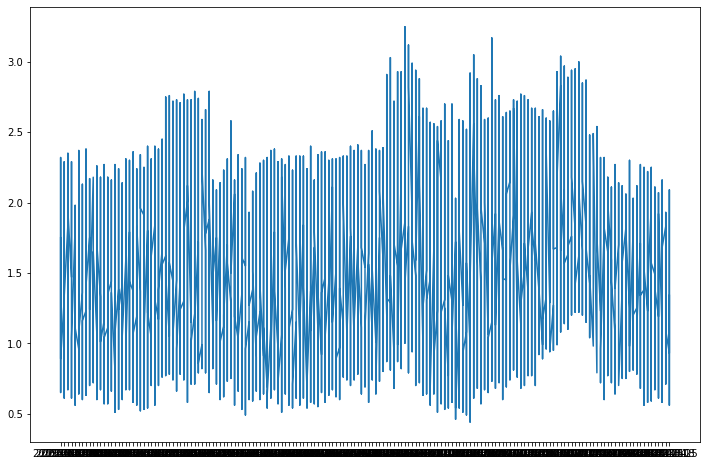

In [ ]:
# Plot date and average price
plt.figure(figsize = (12, 8))
plt.plot(data['Date'], data['AveragePrice'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



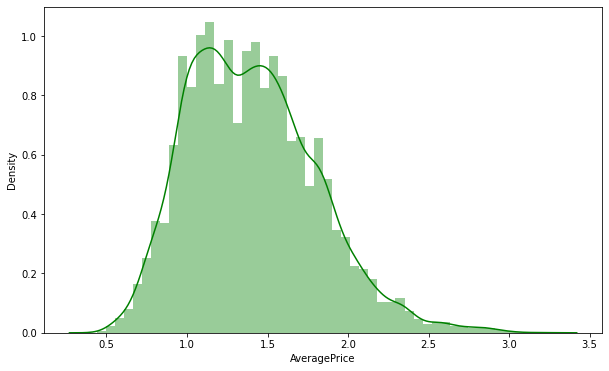

In [ ]:
# Plot distribution of the average price
plt.figure(figsize = (10, 6))
sns.distplot(data['AveragePrice'], color='green')

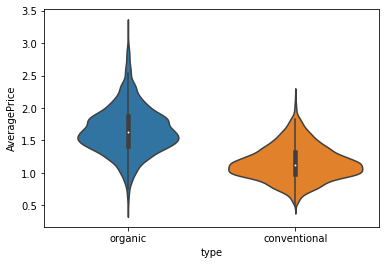

In [ ]:
# Plot a violin plot of the average price vs. avocado type
sns.violinplot(y = data['AveragePrice'], x = 'type' ,data= data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

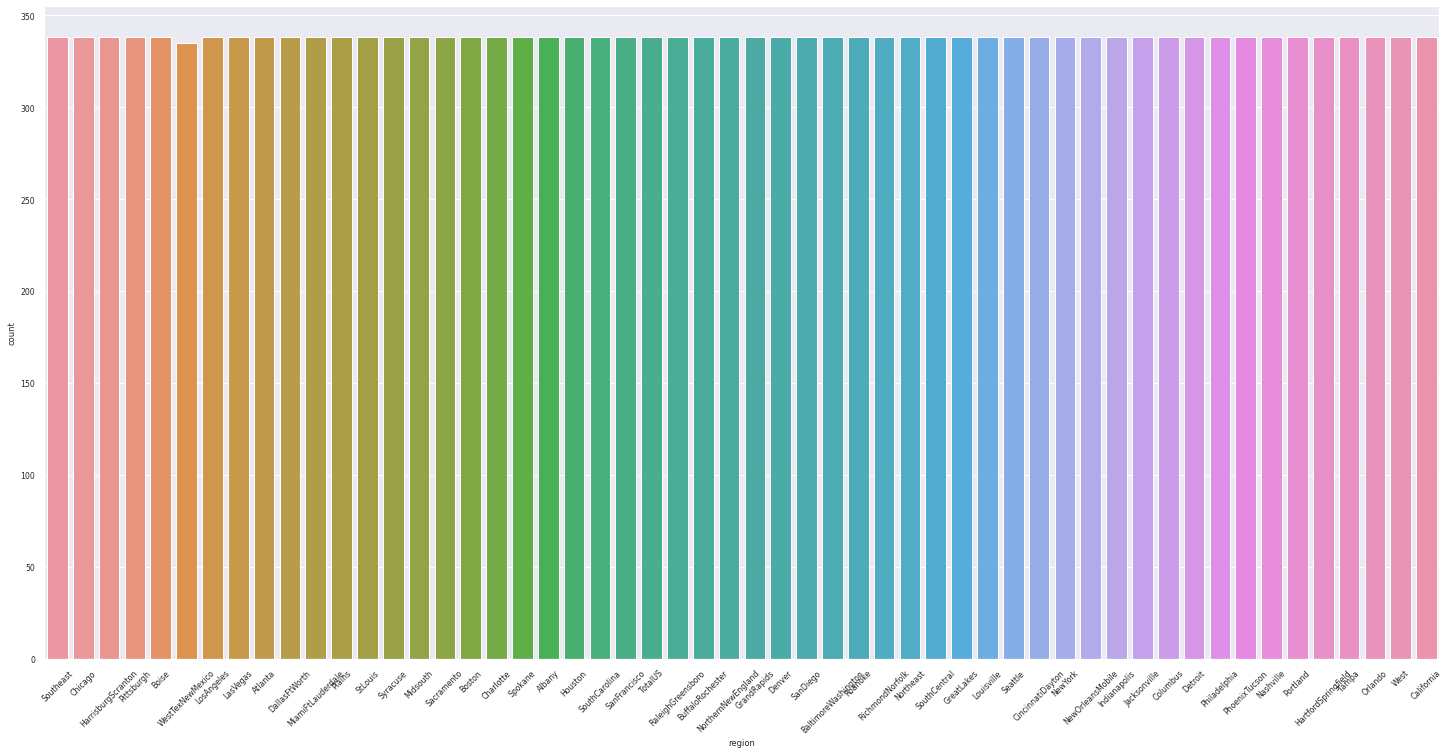

In [ ]:
# Bar Chart to indicate the number of regions

sns.set(font_scale=0.7)
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = data)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

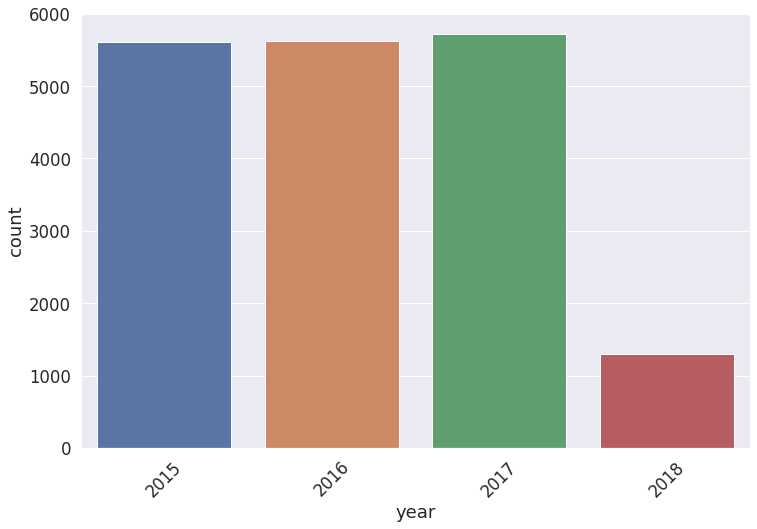

In [ ]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1.5)
plt.figure(figsize=[12, 8])
sns.countplot(x = 'year', data = data)
plt.xticks(rotation = 45)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



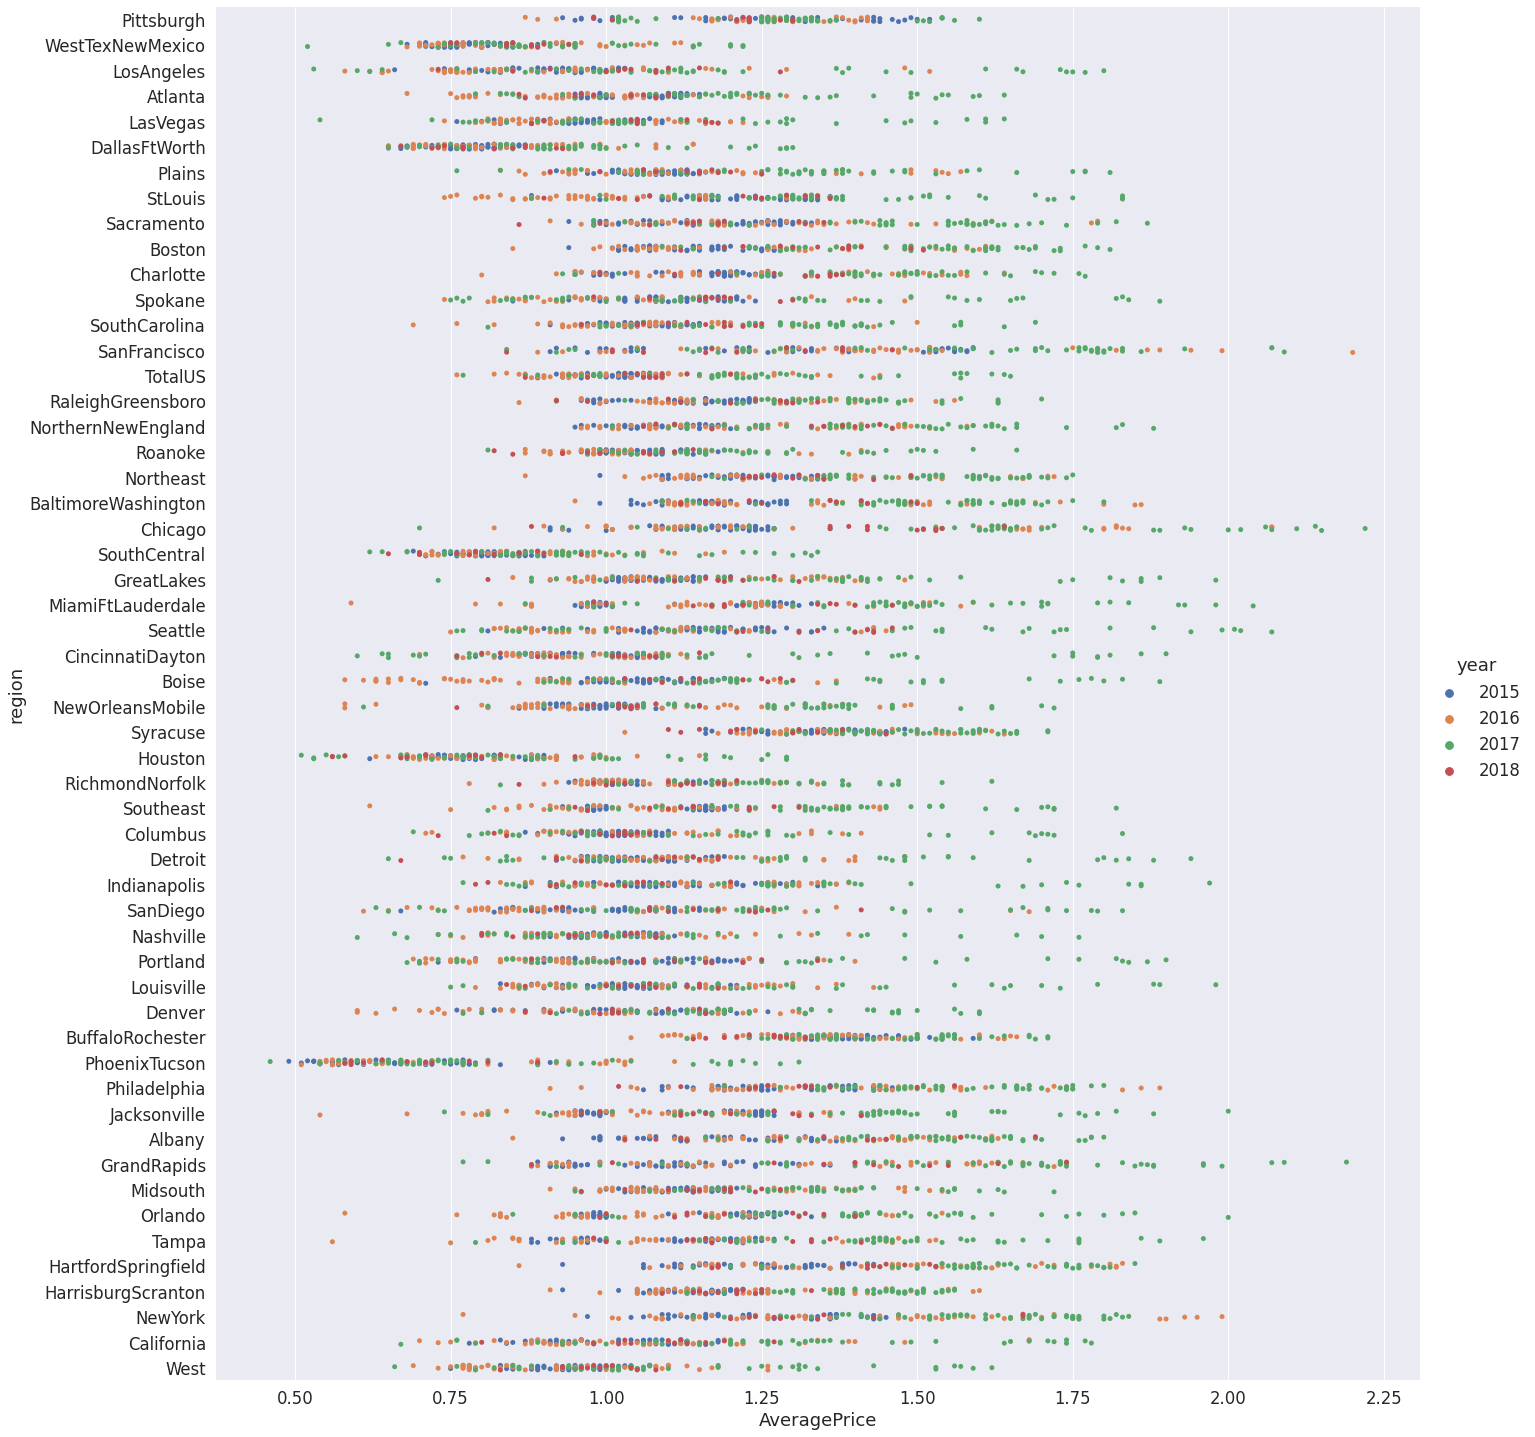

In [ ]:
 # plot the avocado prices vs. regions for conventional avocados
sns.catplot('AveragePrice', 'region', data = data[data['type']=='conventional'], hue = 'year', height = 20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



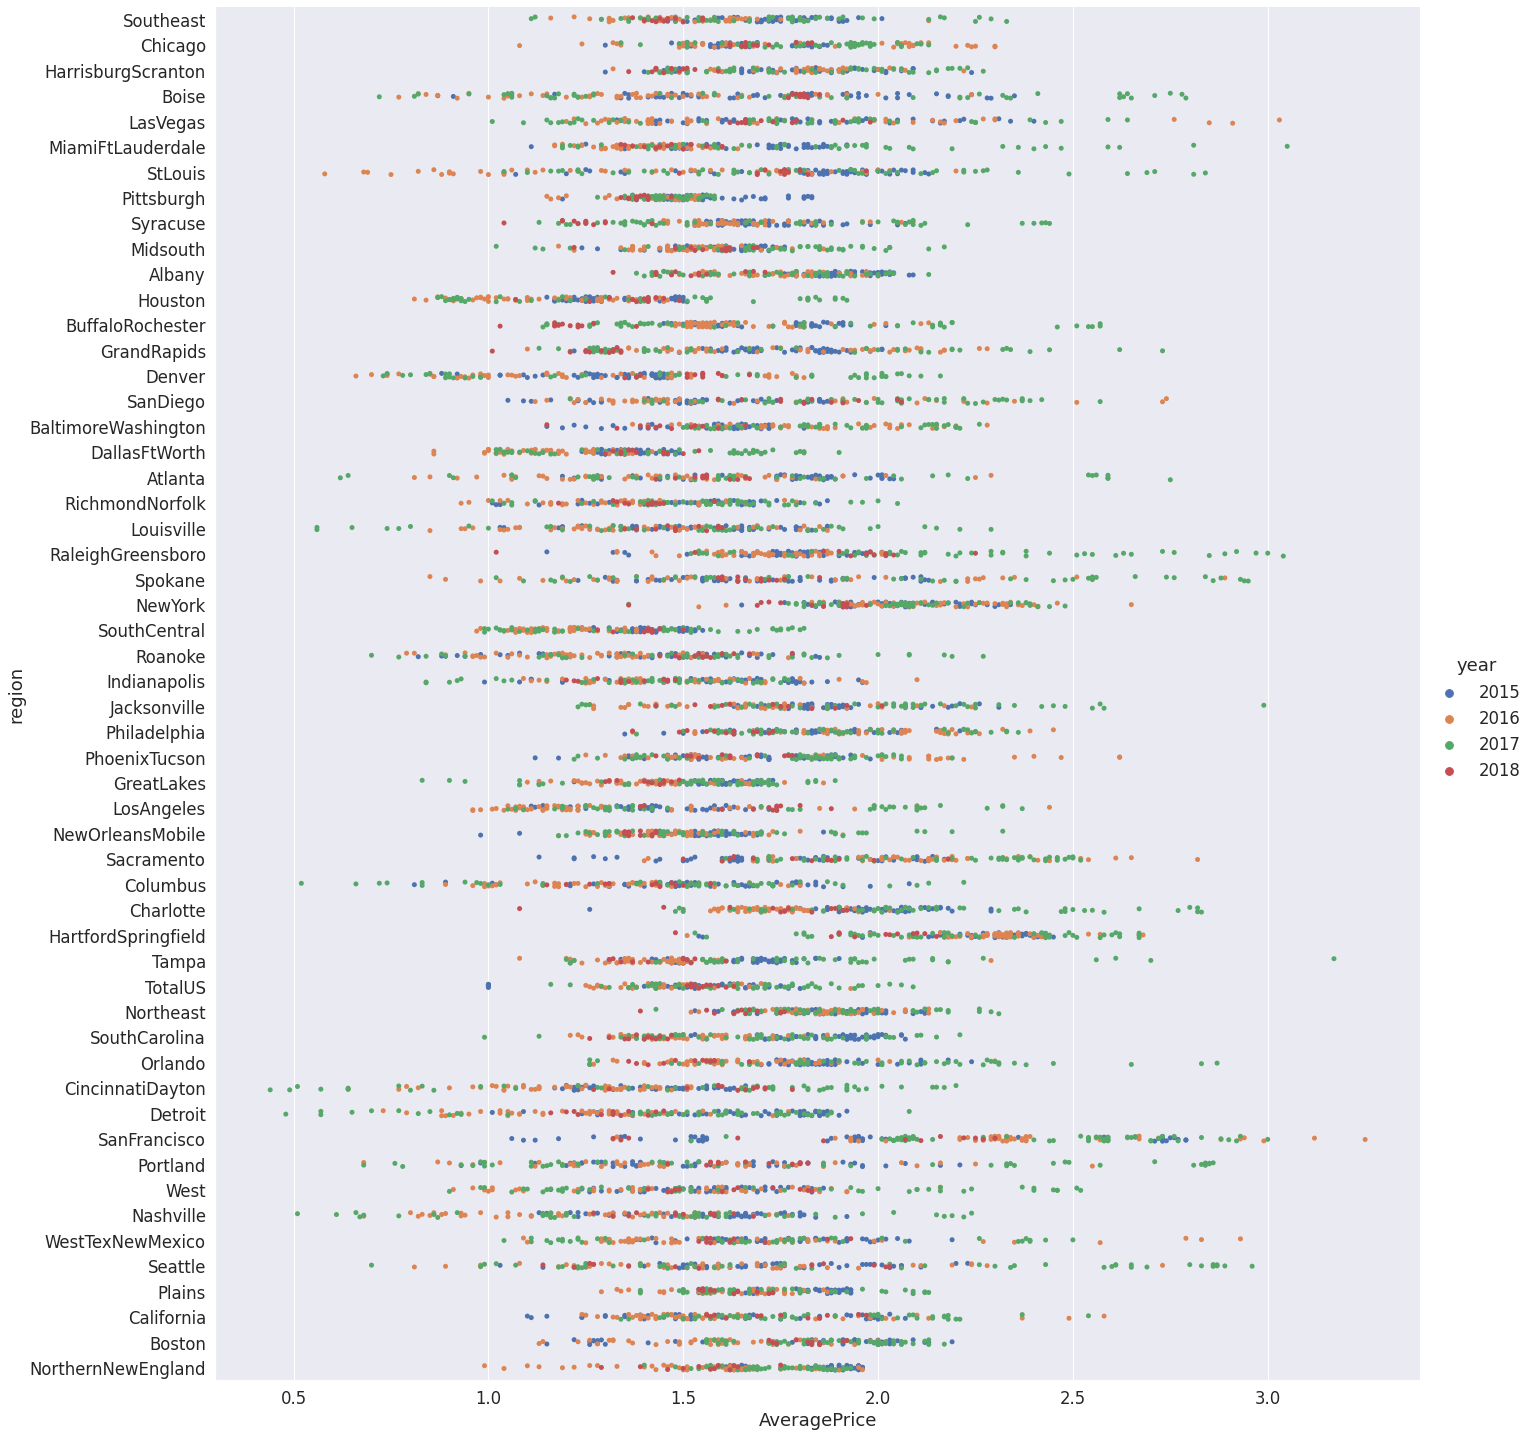

In [ ]:
  # plot the avocado prices vs. regions for organic avocados
sns.catplot('AveragePrice', 'region', data = data[data['type']=='organic'], hue = 'year', height = 20)

# TASK 4: PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL

In [ ]:
# missing data accepted
data_prophet = data[['AveragePrice', 'Date']]

In [ ]:
data_prophet

,AveragePrice,Date
11569,1.75,2015-01-04
9593,1.49,2015-01-04
10009,1.68,2015-01-04
1819,1.52,2015-01-04
9333,1.64,2015-01-04
...,...,...
8574,1.36,2018-03-25
9018,0.70,2018-03-25
18141,1.42,2018-03-25
17673,1.70,2018-03-25


In [ ]:
data_prophet.columns = ['y', 'ds']

In [ ]:
data_prophet

,avg,date
11569,1.75,2015-01-04
9593,1.49,2015-01-04
10009,1.68,2015-01-04
1819,1.52,2015-01-04
9333,1.64,2015-01-04
...,...,...
8574,1.36,2018-03-25
9018,0.70,2018-03-25
18141,1.42,2018-03-25
17673,1.70,2018-03-25


# TASK 5: UNDERSTAND INTUITION BEHIND FACEBOOK PROPHET

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK 6: DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [ ]:
m = Prophet()
m.fit(data_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Forcasting into the future
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498818,0.917726,1.833931,1.498818,1.498818,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,0.0,0.0,0.0,1.385214
1,2015-01-11,1.493637,0.894379,1.850200,1.493637,1.493637,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,0.0,0.0,0.0,1.388445
2,2015-01-18,1.488455,0.872847,1.875681,1.488455,1.488455,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,0.0,0.0,0.0,1.383592
3,2015-01-25,1.483273,0.915341,1.867546,1.483273,1.483273,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,0.0,0.0,0.0,1.359485
4,2015-02-01,1.478091,0.855639,1.783912,1.478091,1.478091,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,0.0,0.0,0.0,1.325978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.161735,0.572909,1.613664,0.981803,1.345687,-0.086198,-0.086198,-0.086198,-0.086198,-0.086198,-0.086198,0.0,0.0,0.0,1.075537
530,2019-03-22,1.161003,0.563798,1.593048,0.980035,1.345537,-0.084518,-0.084518,-0.084518,-0.084518,-0.084518,-0.084518,0.0,0.0,0.0,1.076485
531,2019-03-23,1.160272,0.504344,1.557055,0.978280,1.345639,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,0.0,0.0,0.0,1.077707
532,2019-03-24,1.159540,0.541195,1.594046,0.976633,1.345508,-0.080358,-0.080358,-0.080358,-0.080358,-0.080358,-0.080358,0.0,0.0,0.0,1.079182


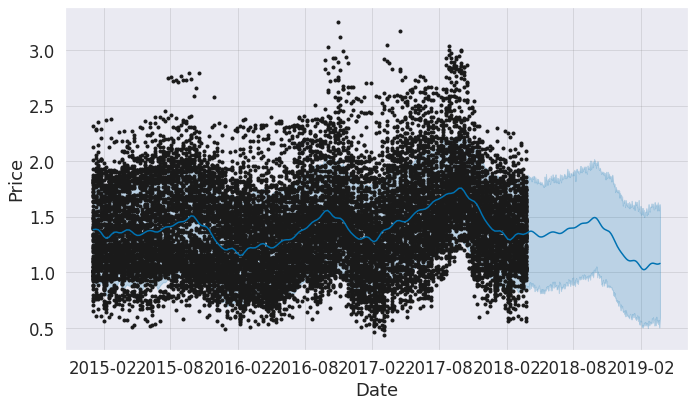

In [ ]:
figure = m.plot(forecast, xlabel = 'Date', ylabel='Price')

(array([736330., 736389., 736450., 736511., 736573., 736634., 736695.]),
 <a list of 7 Text major ticklabel objects>)

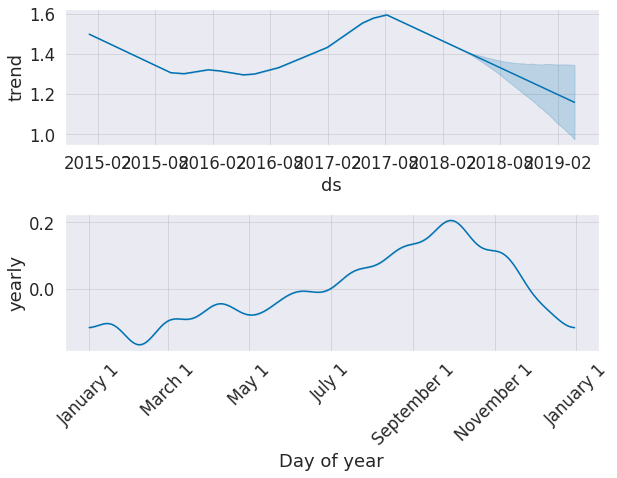

In [ ]:
figure_2 = m.plot_components(forecast, )
plt.xticks(rotation = 45)

# TASK 7: DEVELOP MODEL AND MAKE PREDICTIONS (REGION SPECIFIC) - PART B

In [ ]:
# dataframes creation for both training and testing datasets
df = pd.read_csv('avocado.csv')


In [ ]:
# Select specific region

In [ ]:
df = df[df['region']=='West']

In [ ]:
df = df.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


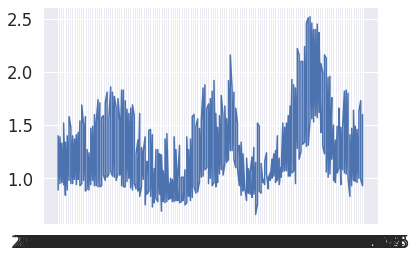

In [ ]:
plt.plot(df['Date'], df['AveragePrice'])

In [ ]:
df1 = df[['AveragePrice', 'Date']]

In [ ]:
df1.columns = ['y', 'ds']

In [ ]:
m = Prophet()
m.fit(df1)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


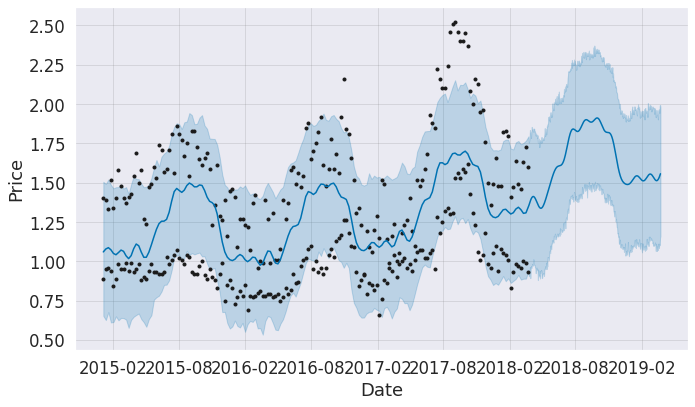

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

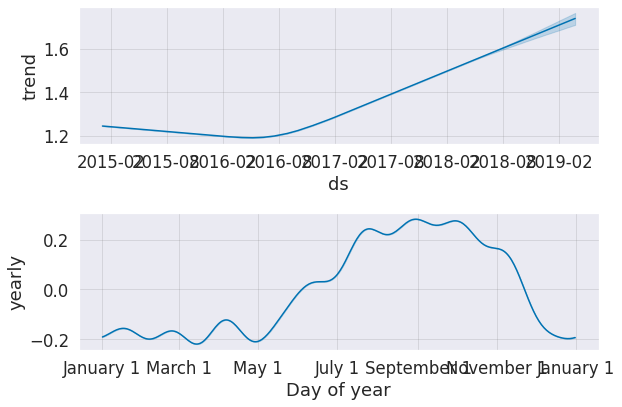

In [ ]:
figure3 = m.plot_components(forecast)

# GREAT JOB!